# **Depression Detection using Deep Learning**

- In today's fast-paced world, mental health issues have become a significant concern, with depression affecting millions of individuals globally. Detecting depression early can significantly improve the outcomes for those affected. By leveraging the power of machine learning, we aim to develop a model that can accurately identify individuals at risk of depression based on various factors.

- This project focuses on building a robust deep learning classification model to predict depression using a dataset containing relevant features. The following steps will guide us through data preparation, model building, and evaluation metrics, ultimately aiming to achieve high accuracy and reliable performance in predicting depression.

<div style="text-align: center;">
    <img src="https://i0.wp.com/www.sciencenews.org/wp-content/uploads/2023/02/021123_LS_depression_feat.jpg" alt="Image">
</div>

# 📊 Data Dictionary
*(Source: [Kaggle - Mentally Stability of the Person](https://www.kaggle.com/competitions/mentally-stability-of-the-person/data))*

| **Column Name**                                   | **Description**                                                                 |
|---------------------------------------------------|---------------------------------------------------------------------------------|
| **id**                                            | Unique identifier for each individual in the dataset.                          |
| **Name**                                          | Name of the individual.                                             |
| **Gender**                                        | Gender of the individual.                         |
| **Age**                                           | Age of the individual in years.                                               |
| **City**                                          | City where the individual resides.                                            |
| **Working Professional or Student**               | Indicates whether the individual is a working professional or a student.      |
| **Profession**                                    | Profession of the individual.                                  |
| **Academic Pressure**                             | Level of pressure experienced due to academic responsibilities.       |
| **Work Pressure**                                 | Level of pressure experienced due to work responsibilities.            |
| **CGPA**                                         | Cumulative Grade Point Average of the individual.             |
| **Study Satisfaction**                            | Satisfaction level regarding studies.                                  |
| **Job Satisfaction**                              | Satisfaction level regarding job.                     |
| **Sleep Duration**                                | Average hours of sleep per day.                                               |
| **Dietary Habits**                               | Description of individual's dietary habits. |
| **Degree**                                       | Highest degree attained by the individual.         |
| **Have you ever had suicidal thoughts?**         | Indicates whether the individual has ever experienced suicidal thoughts (Yes/No). |
| **Work/Study Hours**                             | Average number of hours spent on work/study.                        |
| **Financial Stress**                              | Level of financial stress experienced by the individual.              |
| **Family History of Mental Illness**              | Indicates if there is a family history of mental illness (Yes/No).            |
| **Depression**                                    | Indicates whether the individual is diagnosed with depression (Yes/No).       |

# Importing the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the data

In [2]:
df=pd.read_csv('/kaggle/input/mentally-stability-of-the-person/train.csv')

# EDA - Exploratory Data Analysis 

In [3]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
df.shape

(140700, 20)

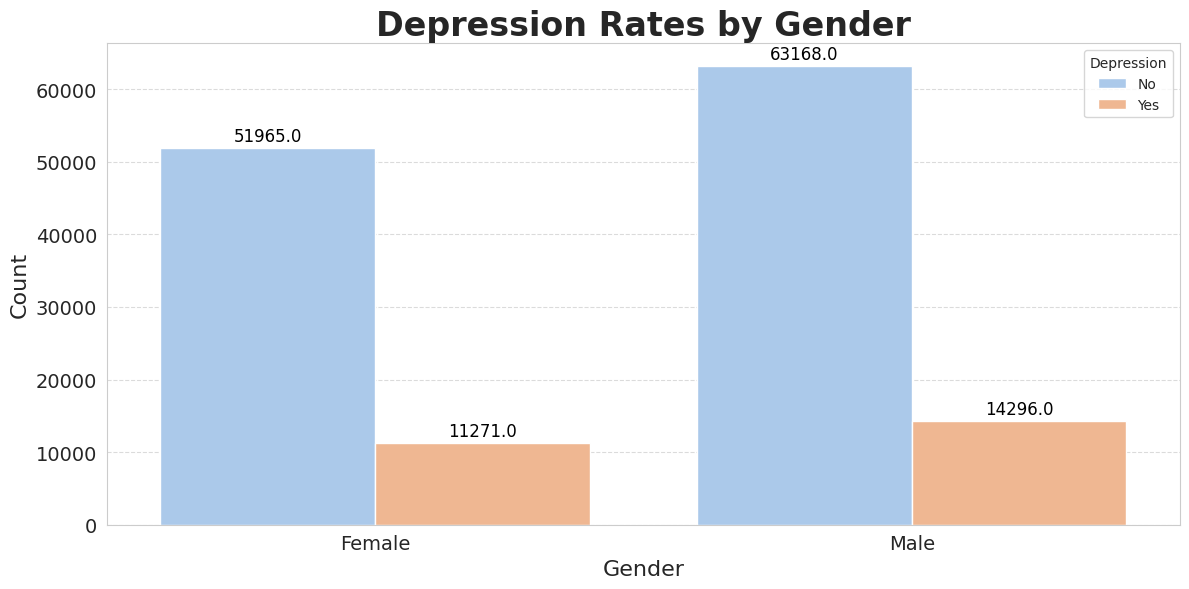

In [7]:
#depression rates by gender graph
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
bar_plot = sns.countplot(data=df, x='Gender', hue='Depression', palette='pastel')
plt.title('Depression Rates by Gender', fontsize=24, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Depression', labels=['No', 'Yes'], frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

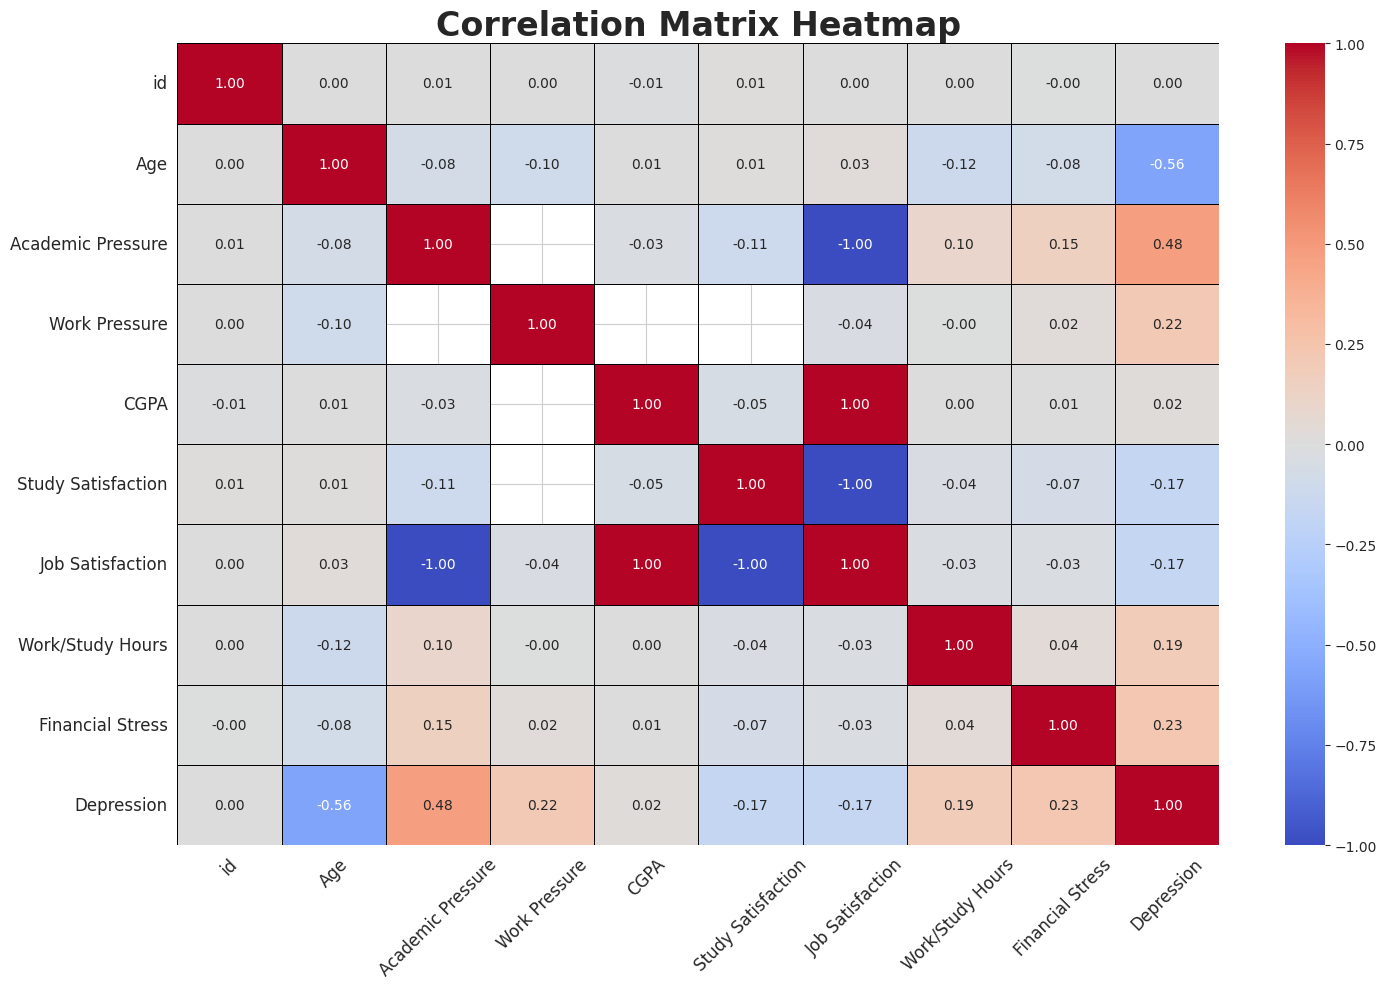

In [8]:
#correlation matrix heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=24, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

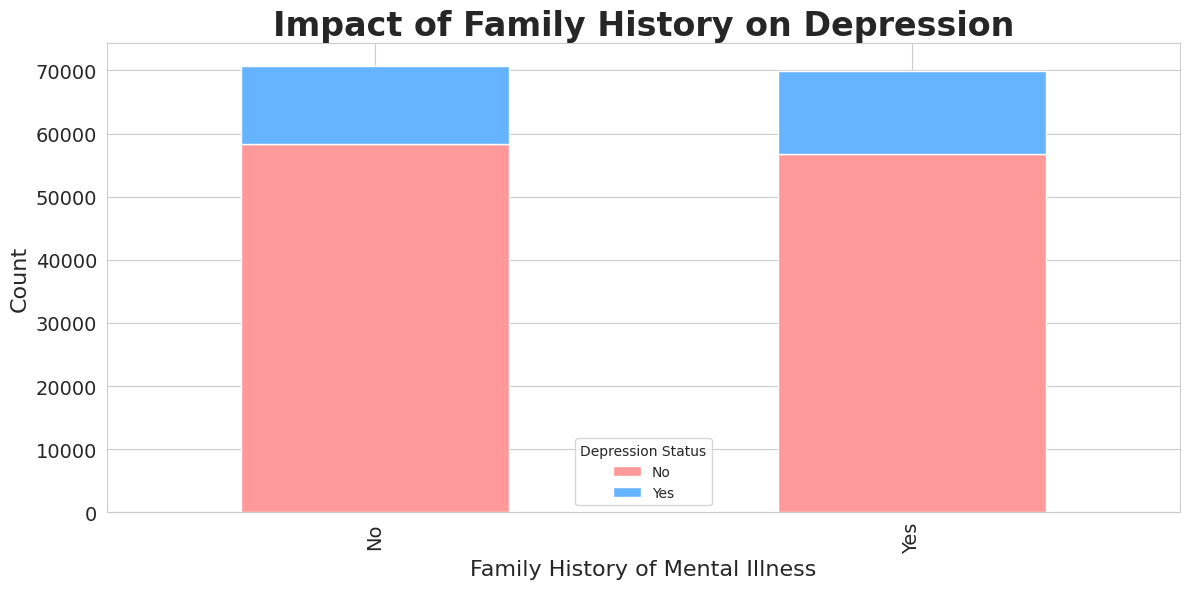

In [9]:
#impact of family history on depression graph
family_history_data = df.groupby(['Family History of Mental Illness', 'Depression']).size().unstack()
family_history_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF9999', '#66B3FF'])

plt.title('Impact of Family History on Depression', fontsize=24, fontweight='bold')
plt.xlabel('Family History of Mental Illness', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Depression Status', labels=['No', 'Yes'], frameon=True)
plt.tight_layout()
plt.show()

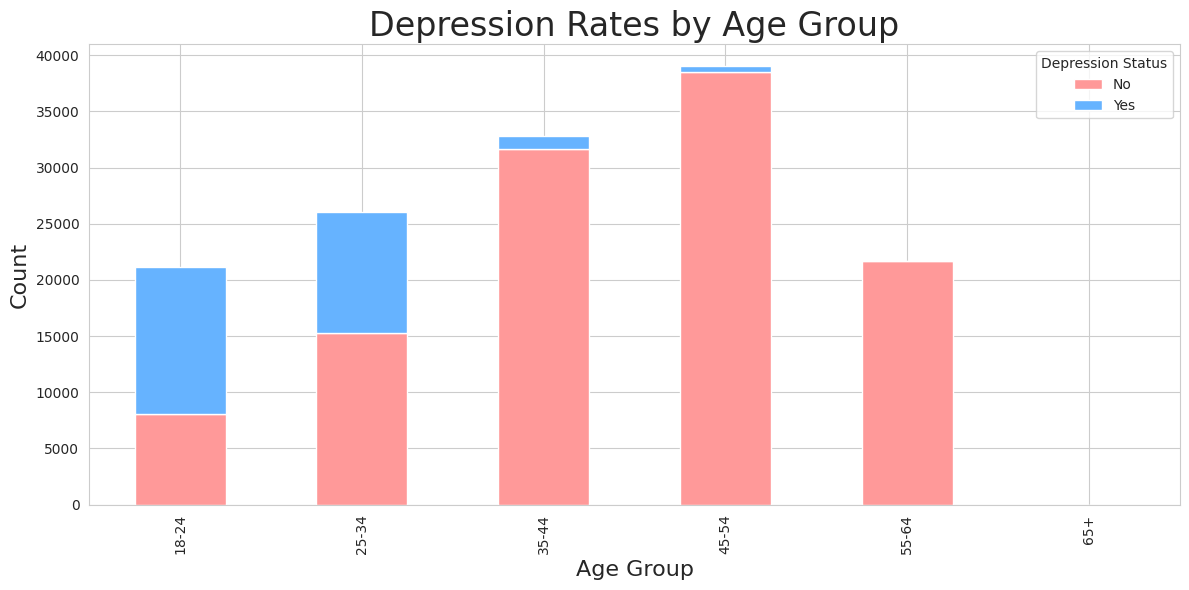

In [10]:
#depression rates by age group
bins = [17, 24, 34, 44, 54, 64, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
temp_df = df.copy()
temp_df['Age Group'] = pd.cut(temp_df['Age'], bins=bins, labels=labels)
age_depression_data = temp_df.groupby(['Age Group', 'Depression']).size().unstack()

age_depression_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF9999', '#66B3FF'])
plt.title('Depression Rates by Age Group', fontsize=24)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='Depression Status', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Feature Engineering

In [11]:
#removing columns with more than 70% missing values
df.dropna(thresh=len(df) * 0.3, axis=1, inplace=True)

In [12]:
#deleting the columns that we think will not be needed in the model
df.drop(['id', 'Name'], axis=1, inplace=True)

In [13]:
#filling the columns with sparse data using the mode
df[['Dietary Habits', 'Degree', 'Financial Stress']] = df[['Dietary Habits', 'Degree', 'Financial Stress']].fillna(df.mode().iloc[0])

In [14]:
#filling the missing data in the 'Work Pressure' and 'Job Satisfaction' columns using the KNN Imputer.
imputer = KNNImputer(n_neighbors=5)
filled_values = imputer.fit_transform(df[['Work Pressure', 'Job Satisfaction']])

df[['Work Pressure', 'Job Satisfaction']] = filled_values

In [15]:
#filling the missing 'Profession' values based on the distribution of the existing professions.
distribution = df['Profession'].value_counts(normalize=True)
missing_count = df['Profession'].isnull().sum()

if missing_count > 0:
    random_choices = np.random.choice(distribution.index, size=missing_count, p=distribution.values)
    
    df.loc[df['Profession'].isnull(), 'Profession'] = random_choices

In [16]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# Deep Learning Modelling

In [17]:
#converting categorical variables to numeric and separating the target variable 'Depression'
df = pd.get_dummies(df, drop_first=True)

x = df.drop(columns=['Depression'])
y = df['Depression']

In [18]:
#splitting the data into training and test sets, normalizing numerical features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          43,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,909 (609.02 KB)

 Trainable params: 51,969 (203.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,940 (406.02 KB)

In [22]:
predictions = model.predict(x_test_scaled)
predicted_classes = (predictions > 0.5).astype('int32')

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
#classification report
report = classification_report(y_test, predicted_classes, target_names=["No Depression (0)", "Depression (1)"])
print(report)

                   precision    recall  f1-score   support

No Depression (0)       0.95      0.96      0.95     22986
   Depression (1)       0.80      0.76      0.78      5154

         accuracy                           0.92     28140
        macro avg       0.87      0.86      0.86     28140
     weighted avg       0.92      0.92      0.92     28140



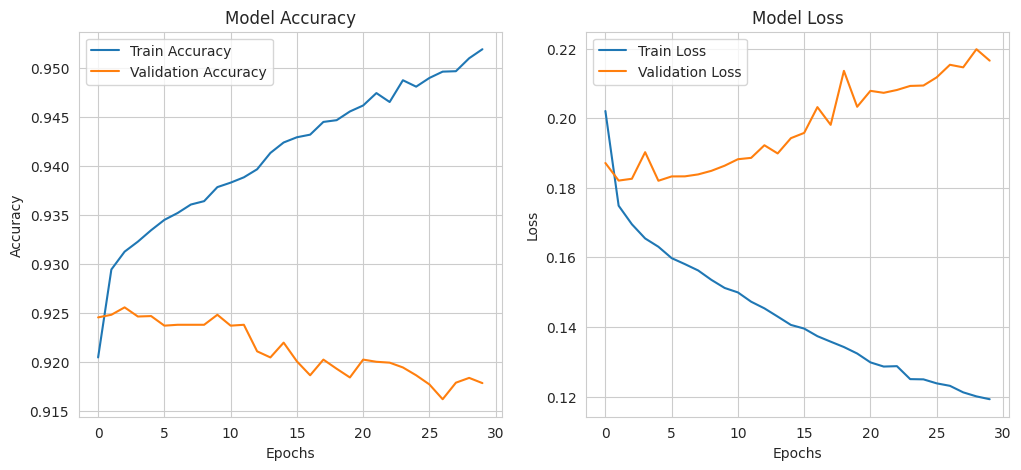

In [24]:
#accuracy and loss graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

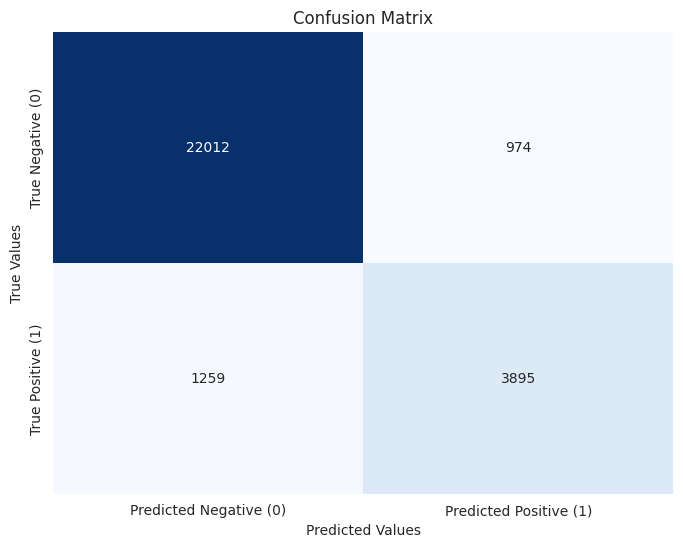

In [25]:
#confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
cm_df = pd.DataFrame(cm, index=["True Negative (0)", "True Positive (1)"], columns=["Predicted Negative (0)", "Predicted Positive (1)"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# **Results and Evaluation**

- **Precision**: This metric indicates the proportion of positive identifications that were actually correct. The model shows a high precision of 0.94 for predicting "No Depression," which implies that it is effective in minimizing false positives. However, the precision for "Depression" is lower at 0.81, suggesting that there is some room for improvement in reducing false positives in this class.
  
- **Recall**: This reflects the model's ability to find all the relevant cases (true positives). A recall of 0.96 for "No Depression" indicates excellent sensitivity in identifying individuals without depression. Conversely, the recall of 0.74 for "Depression" shows that there are individuals with depression who are not being detected as such (false negatives).

- **F1-Score**: The F1-score combines precision and recall into a single metric, providing a balance between the two. The F1-score of 0.95 for "No Depression" and 0.77 for "Depression" highlights the model's robust performance in detecting non-depressed individuals while indicating a need for further tuning to better identify depressed individuals.

- **Overall Accuracy**: The model achieved an impressive overall accuracy of 0.92, indicating that 92% of the predictions made by the model were correct across all classes.

The findings from this model can be instrumental in various real-life settings, such as:

- **Mental Health Screening**: The model can be integrated into online mental health assessment tools to provide preliminary screening for depression, helping users identify if they might benefit from further evaluation by a mental health professional.

- **Corporate Wellness Programs**: Organizations can employ this model within employee wellness programs to regularly assess the mental health of their workforce, facilitating early intervention and promoting overall well-being.

- **Educational Institutions**: Schools and universities could use this tool to monitor students' mental health, providing resources and support to those at risk, thereby enhancing student welfare and academic outcomes.